In [20]:
import pandas as pd
import numpy as np
# Load the dataset
red_wine_path = '/content/data/winequality-red.csv'
white_wine_path = '/content/data/winequality-white.csv'

red_wine = pd.read_csv(red_wine_path, delimiter=';')
white_wine = pd.read_csv(white_wine_path, delimiter=';')

red_wine = pd.read_csv(red_wine_path, delimiter=';')
white_wine = pd.read_csv(white_wine_path, delimiter=';')

#Display the first few rows of each dataset
red_wine.head(), white_wine.head()

(   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.4              0.70         0.00             1.9      0.076   
 1            7.8              0.88         0.00             2.6      0.098   
 2            7.8              0.76         0.04             2.3      0.092   
 3           11.2              0.28         0.56             1.9      0.075   
 4            7.4              0.70         0.00             1.9      0.076   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 11.0                  34.0   0.9978  3.51       0.56   
 1                 25.0                  67.0   0.9968  3.20       0.68   
 2                 15.0                  54.0   0.9970  3.26       0.65   
 3                 17.0                  60.0   0.9980  3.16       0.58   
 4                 11.0                  34.0   0.9978  3.51       0.56   
 
    alcohol  quality  
 0      9.4        5  
 1      9.8        5  
 2 

**Data Distribution:**


*   Visualize how the quality ratings are distributed among red and white wines.

*   Use a count plot to show the number of instances for each quality rating.





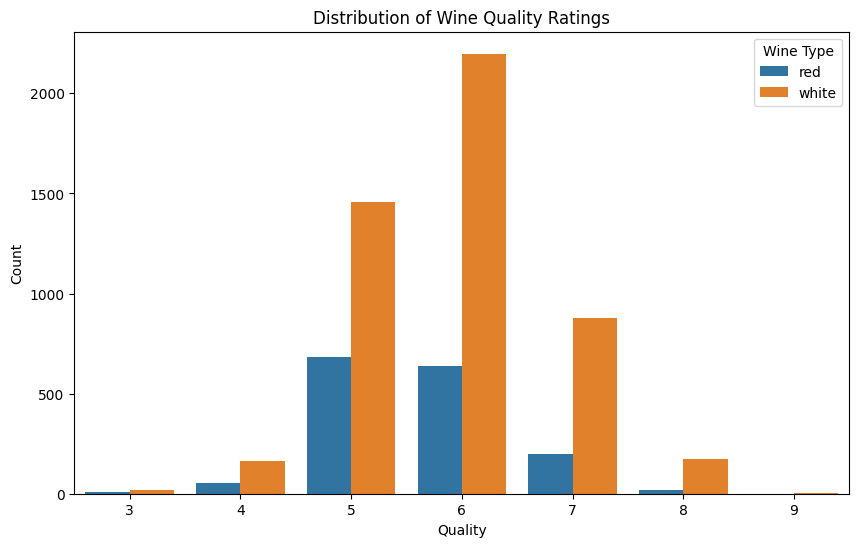

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#Combine datasets
red_wine['type'] = 'red'
white_wine['type'] = 'white'
wine_data = pd.concat([red_wine, white_wine], axis=0)

#Distribution of wine quality ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=wine_data, x='quality', hue='type')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.legend(title='Wine Type')
plt.show()

**Correlation Heatmap**


*   Show how different physicochemical properties correlate with each other and with the quality rating



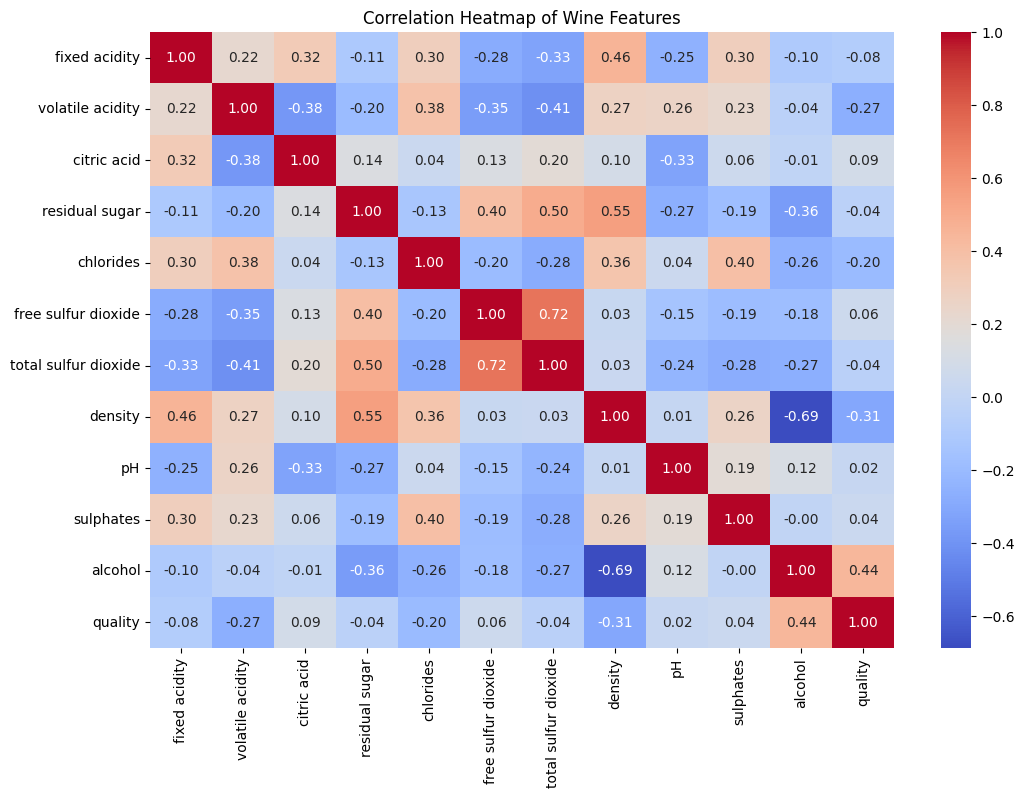

In [15]:
#Correlation heatmap
plt.figure(figsize=(12, 8))
corr = wine_data.drop('type', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Wine Features')
plt.show()


**Feature Importance Analysis**



*   Helps interpret the model by identifying key features that influence wine quality.




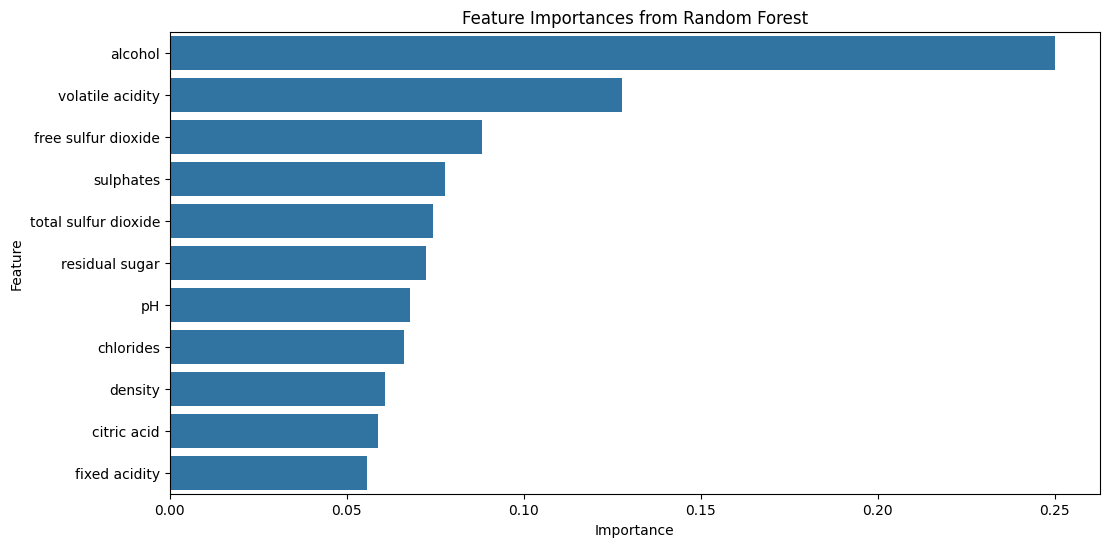

In [17]:
#Feature Importance
from sklearn.ensemble import RandomForestRegressor

#Prepare data for modeling
X = wine_data.drop(['quality', 'type'], axis=1)
y = wine_data['quality']

#Train a Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

#Feature importances
importances = rf_model.feature_importances_
features = X.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**Logistic Regression:**

A simple linear model that predicts the probability of the binary classes.

In [21]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


#Convert quality scores into binary classes
wine_data['quality_label'] = np.where(wine_data['quality'] >= 6, 'good', 'bad')

X = wine_data.drop(['quality', 'quality_label', 'type'], axis=1)
y = wine_data['quality_label']

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Logistic Regression Classification Report")
print(classification_report(y_test, lr_pred))


Logistic Regression Classification Report
              precision    recall  f1-score   support

         bad       0.61      0.58      0.59       451
        good       0.78      0.80      0.79       849

    accuracy                           0.72      1300
   macro avg       0.69      0.69      0.69      1300
weighted avg       0.72      0.72      0.72      1300



**Random Forest:**

An ensemble model that uses multiple decision trees to improve prediction accuracy and control over-fitting.

Random Forest Classification Report
              precision    recall  f1-score   support

         bad       0.75      0.73      0.74       451
        good       0.86      0.87      0.87       849

    accuracy                           0.82      1300
   macro avg       0.81      0.80      0.80      1300
weighted avg       0.82      0.82      0.82      1300



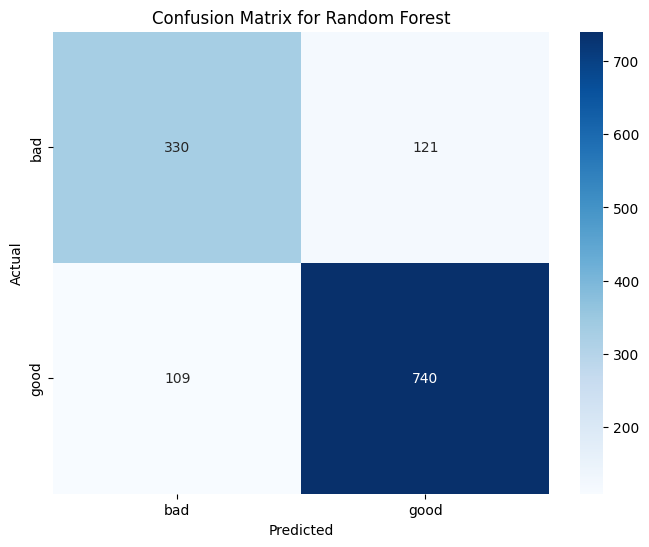

In [25]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Classification Report")
print(classification_report(y_test, rf_pred))

#Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['bad', 'good'], yticklabels=['bad', 'good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

**Neural Network:**

A deep learning model with hidden layers to capture complex patterns in the data.

In [24]:
from sklearn.neural_network import MLPClassifier
#Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam')
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)
print("Neural Network Classification Report")
print(classification_report(y_test, nn_pred))

Neural Network Classification Report
              precision    recall  f1-score   support

         bad       0.66      0.69      0.67       451
        good       0.83      0.81      0.82       849

    accuracy                           0.77      1300
   macro avg       0.74      0.75      0.75      1300
weighted avg       0.77      0.77      0.77      1300



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
from sklearn.metrics import accuracy_score

#Logistic Regression Accuracy
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)

#Random Forest Accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

#Neural Network Accuracy
nn_accuracy = accuracy_score(y_test, nn_pred)
print("Neural Network Accuracy:", nn_accuracy)


Logistic Regression Accuracy: 0.7238461538461538
Random Forest Accuracy: 0.823076923076923
Neural Network Accuracy: 0.7669230769230769
